In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [3]:
A = 0
B = 1
n = 141
h = (B-A)/(n-1)
x_j = np.linspace(A, B, n)



def real(x, p1=2, p2=np.pi*5.5, p3=1.123):
    '''Defining the coefficient p in the d.e.'''
    return p1 * np.sin(p2 * x) + p3

def q(x):
    return 2*np.cos(x)
def k(x):
    return 2*np.sin(2*x)


In [4]:

alpha1 = 1
alpha2 = 1

def find_params2(k_function, q_function, alpha1, alpha2, start_point, end_point, real_function, h=1e-4):
    """
    Calculate the differential parameters based on input functions and constants.
    
    Args:
    k_function (callable): A function for k(x).
    q_function (callable): A function for q(x).
    alpha1, alpha2 (float): Coefficients.
    start_point, end_point (float): Start and end points of the interval.
    real_function (callable): A function for real(x).
    h (float): Step size for numerical differentiation (default: 1e-4).
    
    Returns:
    tuple: A tuple containing the differential function f_x and values mu1, mu2.
    """

    def numerical_derivative(func, x, h):
        return (func(x + h) - func(x)) / h

    def differential_function(x):
        du_x_plus_h = numerical_derivative(real_function, x + h, h)
        du_x = numerical_derivative(real_function, x, h)
        return -(k_function(x + h) * du_x_plus_h - k_function(x) * du_x) / h + q_function(x) * real_function(x)

    mu1 = -numerical_derivative(real_function, start_point, h) * k_function(start_point) + alpha1 * real_function(start_point)
    mu2 = numerical_derivative(real_function, end_point, h) * k_function(end_point) + alpha2 * real_function(end_point)

    return differential_function, mu1, mu2

# Example usage
rhs, mu1, mu2 = find_params2(k_function=k, q_function=q, alpha1=alpha1, alpha2=alpha2, start_point=A, end_point=B, real_function=real)
print(rhs(1), mu1, mu2)

-1086.6997873617415 1.123 -0.8227048579016484


In [5]:
def A_U(k_function, q_function, u1_function, start_point, end_point, x, steps=10000):
    """
    Calculate the differential equation value at a point x based on provided functions and interval.

    Args:
    k_function (callable): Function for k(x).
    q_function (callable): Function for q(x).
    u1_function (callable): Function for u1(x).
    start_point, end_point (float): Start and end points of the interval.
    x (float): Point at which to calculate the differential equation.
    steps (int): Number of steps for numerical differentiation (default: 10000).

    Returns:
    float: Value of the differential equation at point x.
    """

    step = (end_point - start_point) / steps

    def central_diff(func, x, h):
        return (func(x + h) - func(x - h)) / (2 * h)

    du1 = central_diff(u1_function, x, step)
    d_k = central_diff(k_function, x, step)
    d_du1 = central_diff(lambda y: central_diff(u1_function, y, step), x, step)

    duk1du1 = d_k * du1 + k_function(x) * d_du1
    return -duk1du1 + q_function(x) * u1_function(x)

A1 =  (alpha2*mu1-alpha1*mu2)/(alpha2*(-k(A)+A*alpha1)-alpha1*(k(B)+B*alpha2))
print(A1)

B1 =  (k(B)*A1+alpha2*B*A1-mu2)/(-alpha2)
print(B1)


-0.6903102286520799
1.1230000000000002


In [6]:
x_j

array([0.        , 0.00714286, 0.01428571, 0.02142857, 0.02857143,
       0.03571429, 0.04285714, 0.05      , 0.05714286, 0.06428571,
       0.07142857, 0.07857143, 0.08571429, 0.09285714, 0.1       ,
       0.10714286, 0.11428571, 0.12142857, 0.12857143, 0.13571429,
       0.14285714, 0.15      , 0.15714286, 0.16428571, 0.17142857,
       0.17857143, 0.18571429, 0.19285714, 0.2       , 0.20714286,
       0.21428571, 0.22142857, 0.22857143, 0.23571429, 0.24285714,
       0.25      , 0.25714286, 0.26428571, 0.27142857, 0.27857143,
       0.28571429, 0.29285714, 0.3       , 0.30714286, 0.31428571,
       0.32142857, 0.32857143, 0.33571429, 0.34285714, 0.35      ,
       0.35714286, 0.36428571, 0.37142857, 0.37857143, 0.38571429,
       0.39285714, 0.4       , 0.40714286, 0.41428571, 0.42142857,
       0.42857143, 0.43571429, 0.44285714, 0.45      , 0.45714286,
       0.46428571, 0.47142857, 0.47857143, 0.48571429, 0.49285714,
       0.5       , 0.50714286, 0.51428571, 0.52142857, 0.52857

In [7]:
def find_phi(x,j):
    
    if j== 0:
        if x < x_j[0]:
            return 0
        elif x > x_j[1]:
            return 0
        else: return (x_j[j+1]-x)/h
    elif j == n-1:
        if x>x_j[-1]:
            return 0
        elif x < x_j[-2]:
            return 0
        
        return (x-x_j[j-1])/h
    elif x < x_j[j]-h or x> x_j[j+1]:
        return 0
    
    elif x <= x_j[j]:
        return (x-x_j[j-1])/h
    else:
        return (x_j[j+1]-x)/h

In [8]:
alpha_ii = np.zeros((n,n))
alpha_ii


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
acc = 1000
step = h/(acc-1)

for i in range(1,n):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]-h+l*step ) + h**2*find_phi(x_j[i]-h+l*step, i)*find_phi(x_j[i]-h+l*step, i-1) *q(x_j[i]-h+l*step))*step
    alpha_ii[i,i-1] = 1/h**2* (sum_ii )
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]+l*step) + h**2*find_phi(x_j[i]+l*step, i)*find_phi(x_j[i]+l*step, i+1)*q(x_j[i]+l*step))*step
    alpha_ii[i,i+1] = 1/h**2* (sum_ii )
for i in range(n):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (k(x_j[i]-h+l*step) + (x_j[i]-h+l*step - x_j[i-1])**2*q(x_j[i-1]+l*step))*step
        sum_ii+= (k(x_j[i]+l*step) + (-x_j[i]-l*step + x_j[i]+h)**2*q(x_j[i]+l*step))*step
    alpha_ii[i,i] = 1/h**2* (sum_ii)    

alpha_ii[0,0] =  1/h**2 * np.sum([(k(x_j[0]+l*step)+h*h* find_phi(x_j[0]+l*step, 0)**2*q(x_j[0]+l*step))*step for l in range(acc)])  
alpha_ii[-1,-1] = 1/h**2* np.sum([(k(x_j[n-2]+l*step)+h*h*find_phi(x_j[n-2] + l*step,n-1)**2*q(x_j[n-2]+l*step))*step for l in range(acc)]) 
alpha_ii[0,0]+= alpha1
alpha_ii[-1,-1] += alpha2 

print(A)
alpha_ii

0


array([[   3.00673697,   -1.99958699,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  -1.99958699,    8.01700097,   -6.00311439, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   -6.00311439,   16.02282922, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  516.16005171,
        -257.29531555,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -257.29531555,
         512.9844114 , -255.68128379],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -255.68128379,  256.68516125]])

In [10]:
b_ii = np.zeros(n)


b_ii= b_ii.T
b_ii
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [11]:
def find_b_ii(rhs):
    acc = 1000
    step = h/(acc-1)
    for i in range(0,n):
        sum_ii = 0  
        for l in range(acc):
            sum_ii+= (rhs(x_j[i]+l*step)*find_phi(x_j[i]+l*step, i))*step
            sum_ii+= (rhs(x_j[i]-h+l*step)*find_phi(x_j[i-1]+l*step, i))*step
        b_ii[i] =  (sum_ii  )
        
    b_ii[0] = np.sum([(rhs(x_j[0]+l*step)*find_phi(x_j[0]+l*step,0))*step  for l in range(acc)]) +mu1 
    b_ii[-1] = np.sum([(rhs(x_j[n-2]+l*step-h)*find_phi(x_j[n-2]+l*step,n-1))*step for l in range(acc)]) + mu2
    print(b_ii)
    return b_ii

In [12]:
y_i = np.linalg.solve(alpha_ii,find_b_ii(lambda x: rhs(x) ))
y_i
#-A_U(k,q,lambda x: A1*x + B1,A,B,x)

[ 0.63941997 -0.94188451 -0.87074315 -0.75689703 -0.60327394 -0.41385404
 -0.19358179  0.0517438   0.31559832  0.59087781  0.87005834  1.14536594
  1.40895339  1.65308013  1.8702915   2.05359361  2.19662003  2.29378677
  2.34043227  2.33293919  2.26883551  2.14687237  1.96707714  1.73077995
  1.44061334  1.10048423  0.71551894  0.29198178 -0.1628314  -0.64072264
 -1.13274216 -1.62935666 -2.1206323  -2.59642917 -3.04660315 -3.46121155
 -3.83071813 -4.14619382 -4.39950869 -4.58351158 -4.6921935  -4.72083148
 -4.66610968 -4.52621521 -4.30090637 -3.99155163 -3.60113825 -3.13424986
 -2.59701313 -1.99701413 -1.34318545 -0.64566603  0.08436413  0.83487148
  1.59317541  2.34617017  3.080558    3.78308951  4.44080668  5.04128405
  5.5728637   6.02487929  6.38786521  6.65374653  6.81600618  6.86982601
  6.81219872  6.64200848  6.36007829  5.969183    5.47402718  4.88118823
  4.19902506  3.43755401  2.60829364  1.72408123  0.79886374 -0.15253294
 -1.11465268 -2.07167129 -3.00766765 -3.906899   -4

array([ 1.12271900e+00,  1.36843296e+00,  1.61043717e+00,  1.84496504e+00,
        2.06843321e+00,  2.27743433e+00,  2.46878320e+00,  2.63956399e+00,
        2.78717410e+00,  2.90936362e+00,  3.00426946e+00,  3.07044368e+00,
        3.10687547e+00,  3.11300653e+00,  3.08873960e+00,  3.03443988e+00,
        2.95092952e+00,  2.83947511e+00,  2.70176841e+00,  2.53990064e+00,
        2.35633063e+00,  2.15384749e+00,  1.93552809e+00,  1.70469035e+00,
        1.46484271e+00,  1.21963078e+00,  9.72781887e-01,  7.28048360e-01,
        4.89150462e-01,  2.59719785e-01,  4.32440112e-02, -1.56986150e-01,
       -3.37927023e-01, -4.96828269e-01, -6.31274728e-01, -7.39223168e-01,
       -8.19033364e-01, -8.69493060e-01, -8.89836411e-01, -8.79755639e-01,
       -8.39405722e-01, -7.69402039e-01, -6.70811011e-01, -5.45133888e-01,
       -3.94283915e-01, -2.20557226e-01, -2.65979271e-02,  1.84642129e-01,
        4.09948239e-01,  6.45891753e-01,  8.88882225e-01,  1.13522203e+00,
        1.38116261e+00,  

In [13]:
u_app = lambda x: np.sum([y_i[j]*find_phi(x,j)  for j in range(n)])
u_app(0)

1.1227189959229325

In [14]:
X = np.linspace(A,B,221)
Y_app = [u_app(x)   for x in X]

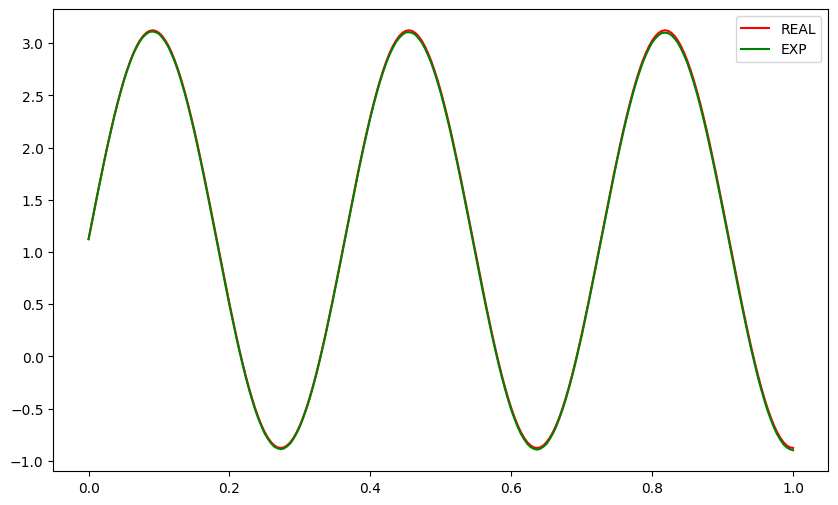

In [15]:
plt.figure(figsize=(10, 6))
plt.plot( X,real(X),c='r', label="REAL")
plt.plot( X,Y_app,c='g', label="EXP")
plt.legend()
plt.show()